In [1]:
import pandas as pd 


# BAN utils

liste de petits utilitaires pour récupérer des informations de la ban


## get communes

d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\assets\__init__.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  com_associe = com_associe.append(com_parent)
2023-02-07 14:06:15 geocoding_tools DEBUG    geocoding_tools logs will be written in a file d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\logger.txt for the following level INFO
2023-02-07 14:06:15 geocoding_tools WARNING  ADDOK NOT PRESENT IN ENV !


<AxesSubplot:>

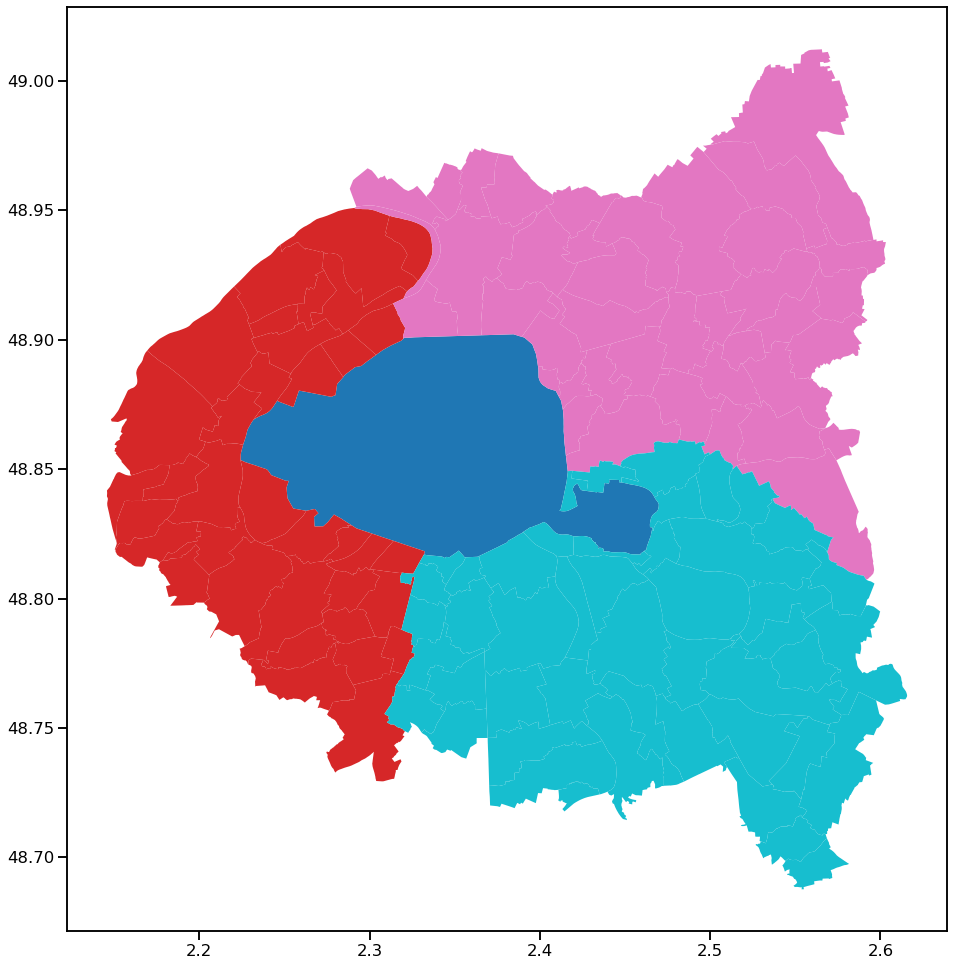

In [2]:
from geocoding_tools.ban_utils import get_communes_table_by_dept
com_ban_geo = get_communes_table_by_dept(['75','92','93','94'])

com_ban_geo.plot(figsize=(17,17),column='codeDepartement')

In [29]:
com_ban_geo

geometry  \
0   POLYGON ((2.36420 48.81640, 2.36333 48.81615, ...   
0   POLYGON ((2.31240 48.77214, 2.31859 48.77101, ...   
1   POLYGON ((2.31982 48.91594, 2.31884 48.91563, ...   
2   POLYGON ((2.31908 48.81000, 2.31866 48.80943, ...   
3   POLYGON ((2.26639 48.90629, 2.26660 48.90567, ...   
..                                                ...   
42  POLYGON ((2.37076 48.72003, 2.37071 48.72081, ...   
43  POLYGON ((2.44295 48.72063, 2.44252 48.72125, ...   
44  POLYGON ((2.52498 48.82721, 2.52546 48.82726, ...   
45  POLYGON ((2.42758 48.84157, 2.42780 48.84270, ...   
46  POLYGON ((2.36778 48.77190, 2.36767 48.77397, ...   

                         nom   code codeDepartement      siren   codeEpci  \
0                      Paris  75056              75  217500016  200054781   
0                     Antony  92002              92  219200029  200054781   
1         Asnières-sur-Seine  92004              92  219200045  200054781   
2                    Bagneux  92007              92  219200078  200054781   
3              Bois-Colombes  92009              92  219200094  200054781   
..                       ...    ...             ...        ...        ...   
42         Villeneuve-le-Roi  94077              94  219400777  200054781   
43  Villeneuve-Saint-Georges  94078              94  219400785  200054781   
44        Villiers-sur-Marne  94079              94  219400793  200054781   
45                 Vincennes  94080              94  219400801  200054781   
46           Vitry-sur-Seine  94081              94  219400819  200054781   

   codeRegion                                       codesPostaux  population  
0          11  [75001, 75002, 75003, 75004, 75005, 75006, 750...     2145906  
0          11                                            [92160]       62906  
1          11                                            [92600]       88004  
2          11                                            [92220]       41967  
3          11                                            [92270]       29555  
..        ...                                                ...         ...  
42         11                                            [94290]       21411  
43         11                                            [94190]       34845  
44         11                                            [94350]       29672  
45         11                                            [94300]       49697  
46         11                                            [94400]       95649  

[124 rows x 9 columns]

## correspondance code insee code postal flat

In [30]:
from geocoding_tools.ban_utils import build_communes_cp_table_flat

In [31]:
df_code_cp_flat = build_communes_cp_table_flat(com_ban_geo)


## get ban addr

In [5]:
from geocoding_tools.ban_utils import get_ban_addr_by_dept
from shapely.geometry import Point
import geopandas as gpd

In [6]:
ban_addr_geo= get_ban_addr_by_dept('75')

In [7]:
ban_addr_geo.head()

id id_fantoir numero  rep  nom_voie code_postal code_insee  \
0  75103_ka7f7y_00001        NaN      1  NaN  Voie B/3       75003      75103   
1  75103_ka7f7y_00002        NaN      2  NaN  Voie B/3       75003      75103   
2  75103_ka7f7y_00003        NaN      3  NaN  Voie B/3       75003      75103   
3  75103_ka7f7y_00004        NaN      4  NaN  Voie B/3       75003      75103   
4  75103_ka7f7y_00005        NaN      5  NaN  Voie B/3       75003      75103   

               nom_commune code_insee_ancienne_commune nom_ancienne_commune  \
0  Paris 3e Arrondissement                         NaN                  NaN   
1  Paris 3e Arrondissement                         NaN                  NaN   
2  Paris 3e Arrondissement                         NaN                  NaN   
3  Paris 3e Arrondissement                         NaN                  NaN   
4  Paris 3e Arrondissement                         NaN                  NaN   

   ... type_position alias nom_ld libelle_acheminement nom_afnor  \
0  ...           NaN   NaN    NaN                PARIS  VOIE B 3   
1  ...           NaN   NaN    NaN                PARIS  VOIE B 3   
2  ...           NaN   NaN    NaN                PARIS  VOIE B 3   
3  ...           NaN   NaN    NaN                PARIS  VOIE B 3   
4  ...           NaN   NaN    NaN                PARIS  VOIE B 3   

  source_position source_nom_voie certification_commune cad_parcelles  \
0         commune         commune                     0           NaN   
1         commune         commune                     0           NaN   
2         commune         commune                     0           NaN   
3         commune         commune                     0           NaN   
4         commune         commune                     0           NaN   

                   geometry  
0  POINT (2.35937 48.85842)  
1  POINT (2.35952 48.85844)  
2  POINT (2.35949 48.85851)  
3  POINT (2.35963 48.85853)  
4  POINT (2.35964 48.85863)  

[5 rows x 24 columns]

# geocode table

Le coeur du module est de fournir des process tout intégrés pour géocoder des données avec la ban.  


## config addok urls

avant tout géocodage, configurer les urls du service addok. Par défaut ceux-cis pointent sur le service en ligne https://adresse.data.gouv.fr à vocation de tests sur de petits échantillons. 

il est essentiel de changer les urls de productions de géocodage nottament pour le géocodage csv

In [33]:
from geocoding_tools.config import addok_ban_urls

In [34]:
from geocoding_tools.addok_utils import get_addok_search
from geocoding_tools.config import addok_ban_urls


In [10]:
addok_ban_urls['ADDOK_SEARCH_CSV_URL']='your/addok/url'
addok_ban_urls['ADDOK_SEARCH_CSV_URL']='https://api-adresse.data.gouv.fr/search/csv'

In [35]:
addok_ban_urls

{'ADDOK_URL': 'https://api-adresse.data.gouv.fr',
 'GEO_API_URL': 'https://geo.api.gouv.fr',
 'BAN_ADDR_DEPT_URL': 'https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-{dept}.csv.gz',
 'ADDOK_SEARCH_CSV_URL': 'https://api-adresse.data.gouv.fr/search/csv',
 'ADDOK_SEARCH_URL': 'https://api-adresse.data.gouv.fr/search/?q=',
 'COMMUNES_DEPT_URL': 'https://geo.api.gouv.fr/departements/{code}/communes?format=geojson'}

## geocode simple

La méthode geocode simple est la méthode de géocodage basique qui réalise un géocodage avec très peu de retravail sur les données brutes d'adresses du jeu de données à géocoder. Ici dans l'exemple un échantillon du jeu de données des données locales de l'énergie d'ENEDIS(https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-05/donnees-electricite-2018.zip) est géocodé avec cette méthode car la base d'adresse d'ENEDIS est plutôt propre et standardisée avec la poste et necessite donc peu de retravail.

### import

In [40]:
from pkg_resources import resource_filename
import pandas as pd
from geocoding_tools.geocode_table import simple_geocode_table,advanced_geocode_table
from geocoding_tools.geocode_table import *

### lecture de l'échantillon de donnée

In [41]:
file_path = resource_filename('geocoding_tools','tests/sample_data/sample_dle_enedis_2018.csv')
table = pd.read_csv(file_path,index_col=0,dtype='str')
table['code_insee'] = table.CODE_IRIS.apply(lambda x: x[0:5]) # code insee récupéré de l'iris. 

In [42]:
table

OPERATEUR ANNEE FILIERE  CODE_IRIS                     ADRESSE  \
0      Enedis  2018       E  010040101        659 AVENUE LEON BLUM   
1      Enedis  2018       E  010040101        645 AVENUE LEON BLUM   
2      Enedis  2018       E  010040101        268 RUE DES MOUETTES   
3      Enedis  2018       E  010040101  72 AVENUE DE LA LIBERATION   
4      Enedis  2018       E  010040101         82 RUE DES MOUETTES   
..        ...   ...     ...        ...                         ...   
995    Enedis  2018       E  010530302       152 BOULEVARD DE BROU   
996    Enedis  2018       E  010530302       120 RUE CHARLES DEMIA   
997    Enedis  2018       E  010530302       150 BOULEVARD DE BROU   
998    Enedis  2018       E  010530302      554 RUE LEOPOLD LE HON   
999    Enedis  2018       E  010530302                  4 RUE BARA   

           NOM_COMMUNE CODE_GRAND_SECTEUR      CONSO PDL code_insee  
0    AMBÉRIEU-EN-BUGEY                  I  852,40377   1      01004  
1    AMBÉRIEU-EN-BUGEY                  I   61,78001   1      01004  
2    AMBÉRIEU-EN-BUGEY                  I    63,2543   1      01004  
3    AMBÉRIEU-EN-BUGEY                  I  929,53233   1      01004  
4    AMBÉRIEU-EN-BUGEY                  R   40,67797  22      01004  
..                 ...                ...        ...  ..        ...  
995    BOURG-EN-BRESSE                  T  648,07483   1      01053  
996    BOURG-EN-BRESSE                  T  138,34119   1      01053  
997    BOURG-EN-BRESSE                  T   21,69103   1      01053  
998    BOURG-EN-BRESSE                  T  447,88839   1      01053  
999    BOURG-EN-BRESSE                  T   30,16947   1      01053  

[1000 rows x 10 columns]

### config + appel au géocodeur 

on configure l'appel au géocodeur en renseignant les champs adresses , communes, code postal , code insee

In [43]:
addr_cols_ordered = ['ADRESSE'] # pour les données enedis un seul champs adresse est utilisé(obligatoire)
cityname_col = 'NOM_COMMUNE' # le champs du nom de la commune(optionnel : fortement recommandé)
citycode_col = 'code_insee' # le champs du code insee(recommandé)
postcode_col = None # pas de code postal dans la base enedis(recommandé)
keep_debug_cols = True # garde les colonnes intermédiaire de calcul du géocodage (a desactiver pour optimiser mémoire)
id_col = None # colonne d'identifiant utilisé dans l'échantillon (sinon par défaut génère un id qui est le numéro de ligne en format str)
addok_search_csv_kwargs = None # keyword arguments passés à l'appel à addok_search_csv(geocoding_tools.addok_utils.run_get_addok_search_csv_by_chunks)
dept_col = None # colonne renseignant le département
simple_geocoding_score_threshold = 0.8

In [44]:
table_geo_simple=simple_geocode_table(table,addr_cols_ordered=addr_cols_ordered,cityname_col=cityname_col,citycode_col=citycode_col,
                      postcode_col=postcode_col,keep_debug_cols=True,id_col=id_col,trusted_codes=None)

2023-02-07 14:43:57 geocoding_tools DEBUG    geocoding_tools logs will be written in a file d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\logger.txt for the following level INFO
2023-02-07 14:43:57 geocoding_tools INFO     configs : 
            exception_config
            {'skip_failed_geocoding': False, 'skip_test_working_addok_ban': False}
            multiprocessing_config
            {'processes': 10, 'sleep_time': 0.01, 'nb_async_jobs': 10}
            addok_ban_urls :
            {'ADDOK_URL': 'https://api-adresse.data.gouv.fr', 'GEO_API_URL': 'https://geo.api.gouv.fr', 'BAN_ADDR_DEPT_URL': 'https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-{dept}.csv.gz', 'ADDOK_SEARCH_CSV_URL': 'https://api-adresse.data.gouv.fr/search/csv', 'ADDOK_SEARCH_URL': 'https://api-adresse.data.gouv.fr/search/?q=', 'COMMUNES_DEPT_URL': 'https://geo.api.gouv.fr/departements/{code}/communes?format=geojson'}
            addok_search_config
            {'sleep_time': 0.0

In [47]:
table_geo_simple[['address_concat','result_label','result_score','result_id','result_type','is_geocoded','latitude','longitude']]

address_concat  \
0         659 Avenue Leon Blum 01500 Amberieu En Bugey   
1         645 Avenue Leon Blum 01500 Amberieu En Bugey   
2         268 Rue Des Mouettes 01500 Amberieu En Bugey   
3    72 Avenue De La Liberation 01500 Amberieu En B...   
4          82 Rue Des Mouettes 01500 Amberieu En Bugey   
..                                                 ...   
995        152 Boulevard De Brou 01000 Bourg En Bresse   
996        120 Rue Charles Demia 01000 Bourg En Bresse   
997        150 Boulevard De Brou 01000 Bourg En Bresse   
998       554 Rue Leopold Le Hon 01000 Bourg En Bresse   
999                   4 Rue Bara 01000 Bourg En Bresse   

                                          result_label result_score  \
0         659 Avenue Leon Blum 01500 Ambérieu-en-Bugey     0.964737   
1         645 Avenue Leon Blum 01500 Ambérieu-en-Bugey     0.964737   
2         268 Rue des Mouettes 01500 Ambérieu-en-Bugey      0.96607   
3    72 Avenue de la Libération 01500 Ambérieu-en-B...     0.967511   
4          82 Rue des Mouettes 01500 Ambérieu-en-Bugey      0.96607   
..                                                 ...          ...   
995        152 boulevard de brou 01000 Bourg-en-Bresse     0.974652   
996            rue charles demia 01000 Bourg-en-Bresse     0.877104   
997        150 boulevard de brou 01000 Bourg-en-Bresse     0.974652   
998       554 rue leopold le hon 01000 Bourg-en-Bresse     0.966227   
999                   4 rue bara 01000 Bourg-en-Bresse     0.962376   

              result_id  result_type is_geocoded   latitude longitude  
0    01004_nanli0_00659  housenumber        True  45.963526  5.342019  
1    01004_nanli0_00645  housenumber        True  45.963347  5.342359  
2      01004_0465_00268  housenumber        True  45.960472  5.331948  
3      01004_0430_00072  housenumber        True  45.967126  5.338795  
4      01004_0465_00082  housenumber        True  45.961353  5.334014  
..                  ...          ...         ...        ...       ...  
995    01053_0620_00152  housenumber        True     46.198  5.232518  
996          01053_0788       street        True  46.194347  5.229166  
997    01053_0620_00150  housenumber        True  46.198683   5.23439  
998    01053_2269_00554  housenumber        True  46.194335  5.231949  
999    01053_0340_00004  housenumber        True  46.200313  5.231273  

[1000 rows x 8 columns]

## geocode advanced (example DPE)

La méthode geocode avancée utilise extensivement les champs **commune** **code postal** **code insee** pour générer  un ensemble de champs commune auquel peut appartenir l'adresse fournie. Cela est utile lorsque le jeu de donnée à géocoder n'a pas été basé sur une base d'information fiable comme la BAN la poste ou les api de google par exemple.  Les champs **commune** **code postal** **code insee** peuvent alors être discordants, on peut aussi avoir des adresses dans les milieux ruraux affectés aux petites communes voisines ou a une autre commune d'un même code postal. C'est pour corriger tous ces cas pathologiques que cette méthode est mise en place. Afin de ne pas faire exploser le nombre de géocodage effectif, il est effectué d'abord un géocodage simple pour lequel on garde seulement les très bon résultats puis on lance ce géocodage avancé sur le reste des adresses ayant obtenues des scores moins élevés. 

Un exemple adapté à ce géocodage avancé est la base DPE pour laquelle les champs **commune** **code postal** et **code insee** sont saisis manuellement et donc avec plus de chance d'erreur de saisie.  


### import

In [48]:
from pkg_resources import resource_filename
import pandas as pd
from geocoding_tools.geocode_table import simple_geocode_table,advanced_geocode_table
from geocoding_tools.scripts_specific_bases.dpe import cleanup_dpe_table

### lecture de l'échantillon de donnée

dans geocoding tools certains scripts de nettoyages ont été établis pour certains jeux de données nottament ceux donnés en exemple. 

In [49]:
from geocoding_tools.scripts_specific_bases.dpe import cleanup_dpe_table

In [50]:
file_path = resource_filename('geocoding_tools','tests/sample_data/sample_td001_dpe_38.csv')
table = pd.read_csv(file_path,dtype=str,index_col=0)
table = cleanup_dpe_table(table)

d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\scripts_specific_bases\dpe.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dpe_table[code] = dpe_table[code].astype(str).str.replace('\.0', '').str.zfill(5)


### simple geocoding (pour comparaison)

In [52]:

# attention ici on a l'adresse renseignée sur plusieurs champs. IL EST IMPORTANT DE FOURNIR LA LISTE ORDONNEE DES CHAMPS! 
addr_cols_ordered=['numero_rue','type_voie','nom_rue'] 
cityname_col='commune'
citycode_col='code_insee'
postcode_col='code_postal'
keep_debug_cols=False
id_col='numero_dpe'
addok_search_csv_kwargs=None
dept_col=None
simple_geocoding_score_threshold=0.8

In [53]:


table_geo_simple=simple_geocode_table(table.copy(),addr_cols_ordered=addr_cols_ordered,cityname_col=cityname_col,citycode_col=citycode_col,
                      postcode_col=postcode_col,keep_debug_cols=True,id_col=id_col)

2023-02-07 14:50:49 geocoding_tools DEBUG    geocoding_tools logs will be written in a file d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\logger.txt for the following level INFO
2023-02-07 14:50:49 geocoding_tools INFO     configs : 
            exception_config
            {'skip_failed_geocoding': False, 'skip_test_working_addok_ban': False}
            multiprocessing_config
            {'processes': 10, 'sleep_time': 0.01, 'nb_async_jobs': 10}
            addok_ban_urls :
            {'ADDOK_URL': 'https://api-adresse.data.gouv.fr', 'GEO_API_URL': 'https://geo.api.gouv.fr', 'BAN_ADDR_DEPT_URL': 'https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-{dept}.csv.gz', 'ADDOK_SEARCH_CSV_URL': 'https://api-adresse.data.gouv.fr/search/csv', 'ADDOK_SEARCH_URL': 'https://api-adresse.data.gouv.fr/search/?q=', 'COMMUNES_DEPT_URL': 'https://geo.api.gouv.fr/departements/{code}/communes?format=geojson'}
            addok_search_config
            {'sleep_time': 0.0

### advanced geocoding

On notera lorsque l'on passe au géocodage avancé la multiplication des adresses qui sont géocodées ce qui correspond à la méthode expliquée plus haut

In [55]:
table_geo_adv,comb=advanced_geocode_table(table.copy(),addr_cols_ordered=addr_cols_ordered,cityname_col=cityname_col,citycode_col=citycode_col,
                      postcode_col=postcode_col,keep_debug_cols=True,id_col=id_col)

2023-02-07 14:51:50 geocoding_tools DEBUG    geocoding_tools logs will be written in a file d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\logger.txt for the following level INFO
2023-02-07 14:51:50 geocoding_tools INFO     configs : 
            exception_config
            {'skip_failed_geocoding': False, 'skip_test_working_addok_ban': False}
            multiprocessing_config
            {'processes': 10, 'sleep_time': 0.01, 'nb_async_jobs': 10}
            addok_ban_urls :
            {'ADDOK_URL': 'https://api-adresse.data.gouv.fr', 'GEO_API_URL': 'https://geo.api.gouv.fr', 'BAN_ADDR_DEPT_URL': 'https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-{dept}.csv.gz', 'ADDOK_SEARCH_CSV_URL': 'https://api-adresse.data.gouv.fr/search/csv', 'ADDOK_SEARCH_URL': 'https://api-adresse.data.gouv.fr/search/?q=', 'COMMUNES_DEPT_URL': 'https://geo.api.gouv.fr/departements/{code}/communes?format=geojson'}
            addok_search_config
            {'sleep_time': 0.0

## redressement du score de géocodage avec l'outil de postprocessing bad_geocoding_recovery_partial_ratio

In [62]:
from geocoding_tools.postprocessing import bad_geocoding_recovery_partial_ratio

In [63]:
table_geo_adv['recovery_score']=bad_geocoding_recovery_partial_ratio(table_geo_adv,address_sent_col='address_concat')

In [65]:
table_geo_adv[['address_concat','result_label','result_score','recovery_score','result_id','result_type','geocoding_method','is_geocoded','latitude','longitude']].iloc[2].to_dict()

{'address_concat': 'Residence Le Grand Chemin 67 Chemin Du Plein Ciel 38270 Beaurepaire',
 'result_label': '67 Chemin du Plein - Ciel 38270 Beaurepaire',
 'result_score': 0.5966623691460055,
 'recovery_score': 1.0,
 'result_id': '38034_0270_00067',
 'result_type': 'housenumber',
 'geocoding_method': 'advanced',
 'is_geocoded': True,
 'latitude': 45.340267,
 'longitude': 5.050342}

### run avec get_addok_search

In [22]:
table_geo_adv,comb=advanced_geocode_table(table.copy(),addr_cols_ordered=addr_cols_ordered,cityname_col=cityname_col,citycode_col=citycode_col,
                      postcode_col=postcode_col,keep_debug_cols=True,id_col=id_col,run_addok_option="search")

2023-02-07 14:07:40 geocoding_tools DEBUG    geocoding_tools logs will be written in a file d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\logger.txt for the following level INFO
2023-02-07 14:07:40 geocoding_tools INFO     configs : 
            exception_config
            {'skip_failed_geocoding': False, 'skip_test_working_addok_ban': False}
            multiprocessing_config
            {'processes': 10, 'sleep_time': 0.01, 'nb_async_jobs': 10}
            addok_ban_urls :
            {'ADDOK_URL': 'https://api-adresse.data.gouv.fr', 'GEO_API_URL': 'https://geo.api.gouv.fr', 'BAN_ADDR_DEPT_URL': 'https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-{dept}.csv.gz', 'ADDOK_SEARCH_CSV_URL': 'https://api-adresse.data.gouv.fr/search/csv', 'ADDOK_SEARCH_URL': 'https://api-adresse.data.gouv.fr/search/?q=', 'COMMUNES_DEPT_URL': 'https://geo.api.gouv.fr/departements/{code}/communes?format=geojson'}
            addok_search_config
            {'sleep_time': 0.0

In [23]:
table_geo_adv.loc[table_geo_adv.is_geocoded!=1,['address_concat','result_label','result_score','is_geocoded']]

address_concat result_label result_score  \
507  Residence La Grande Chaume 38860 Les 2 Alpes          NaN          NaN   
860                  Esprit Nature 38600 Fontaine          NaN          NaN   
861                  Esprit Nature 38600 Fontaine          NaN          NaN   
862                  Esprit Nature 38600 Fontaine          NaN          NaN   
864                  Esprit Nature 38600 Fontaine          NaN          NaN   
865                  Esprit Nature 38600 Fontaine          NaN          NaN   
867                  Esprit Nature 38600 Fontaine          NaN          NaN   
869                  Esprit Nature 38600 Fontaine          NaN          NaN   
870                  Esprit Nature 38600 Fontaine          NaN          NaN   
871                  Esprit Nature 38600 Fontaine          NaN          NaN   
872                  Esprit Nature 38600 Fontaine          NaN          NaN   
873                  Esprit Nature 38600 Fontaine          NaN          NaN   
874                  Esprit Nature 38600 Fontaine          NaN          NaN   
875                  Esprit Nature 38600 Fontaine          NaN          NaN   
876                  Esprit Nature 38600 Fontaine          NaN          NaN   
877                  Esprit Nature 38600 Fontaine          NaN          NaN   
878                  Esprit Nature 38600 Fontaine          NaN          NaN   
879                  Esprit Nature 38600 Fontaine          NaN          NaN   
883                  Esprit Nature 38600 Fontaine          NaN          NaN   
884                  Esprit Nature 38600 Fontaine          NaN          NaN   
885                  Esprit Nature 38600 Fontaine          NaN          NaN   
886                  Esprit Nature 38600 Fontaine          NaN          NaN   
887                  Esprit Nature 38600 Fontaine          NaN          NaN   
888                  Esprit Nature 38600 Fontaine          NaN          NaN   
889                  Esprit Nature 38600 Fontaine          NaN          NaN   
890                  Esprit Nature 38600 Fontaine          NaN          NaN   
891                  Esprit Nature 38600 Fontaine          NaN          NaN   
892                  Esprit Nature 38600 Fontaine          NaN          NaN   
893                  Esprit Nature 38600 Fontaine          NaN          NaN   
894                  Esprit Nature 38600 Fontaine          NaN          NaN   
895                  Esprit Nature 38600 Fontaine          NaN          NaN   
896                  Esprit Nature 38600 Fontaine          NaN          NaN   
897                  Esprit Nature 38600 Fontaine          NaN          NaN   
898                  Esprit Nature 38600 Fontaine          NaN          NaN   
899                  Esprit Nature 38600 Fontaine          NaN          NaN   
900                  Esprit Nature 38600 Fontaine          NaN          NaN   
901                  Esprit Nature 38600 Fontaine          NaN          NaN   
902                  Esprit Nature 38600 Fontaine          NaN          NaN   
903                  Esprit Nature 38600 Fontaine          NaN          NaN   
904                  Esprit Nature 38600 Fontaine          NaN          NaN   
905                  Esprit Nature 38600 Fontaine          NaN          NaN   
906                  Esprit Nature 38600 Fontaine          NaN          NaN   
907                  Esprit Nature 38600 Fontaine          NaN          NaN   
908                  Esprit Nature 38600 Fontaine          NaN          NaN   
909                  Esprit Nature 38600 Fontaine          NaN          NaN   
910                  Esprit Nature 38600 Fontaine          NaN          NaN   
911                  Esprit Nature 38600 Fontaine          NaN          NaN   
912                  Esprit Nature 38600 Fontaine          NaN          NaN   
913                  Esprit Nature 38600 Fontaine          NaN          NaN   
914                  Esprit Nature 38600 Fontaine          NaN          NaN   
915   

In [24]:
from geocoding_tools.geocode_table import *
from geocoding_tools.geocode_table import _shared_ressources

In [25]:
sub_citycode_with_postcode=True
trusted_codes=None
trust_dept=True
run_addok_option='search'

In [26]:
table = table.head(10)

In [27]:
# empty shared ressources
for k in list(_shared_ressources):
    del _shared_ressources[k]

if addok_search_csv_kwargs is None:
    addok_search_csv_kwargs = dict()

table, id_col = clean_citycodes_and_ids(table, id_col=id_col, citycode_col=citycode_col, postcode_col=postcode_col)
raw_cols = table.columns.tolist()
table_raw = table.copy()

table, addr_total_cols_ordered, id_col, cityname_col, postcode_col = prep_geocode_table(table=table,
                                                                                        addr_cols_ordered=addr_cols_ordered,
                                                                                        id_col=id_col,
                                                                                        cityname_col=cityname_col,
                                                                                        citycode_col=citycode_col,
                                                                                        postcode_col=postcode_col,
                                                                                        sub_citycode_with_postcode=sub_citycode_with_postcode,
                                                                                        trusted_codes=trusted_codes)

# GEOCODING SIMPLE
table['address_concat'] = build_concat_addr_from_table(table, addr_total_cols_ordered)
table = table.dropna(subset=['address_concat'])
table['id_addr'] = range(0, table.shape[0])
table['id_addr'] = table['id_addr'].astype(str)
geocode_cols = ['id_addr', 'address_concat']
addr_col = 'address_concat'
if run_addok_option == 'search_csv':
    table_geo = run_get_addok_search_csv_by_chunks(table, geocode_cols=geocode_cols, addr_cols=addr_col,
                                                   **addok_search_csv_kwargs)
elif run_addok_option=='search':
    table_geo = run_get_addok_search_by_chunks(table, geocode_cols=geocode_cols, addr_col=addr_col,
                                                   **addok_search_csv_kwargs)
else:
    raise Exception('bad run_addok_option pick either search or search_csv')

d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\addr_utils.py:65: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_addr = pd.Series(index=df.index).fillna('')
2023-02-07 14:15:32 geocoding_tools DEBUG    0 duplicates detected
2023-02-07 14:15:32 geocoding_tools DEBUG    geocoding 10 instead of 10
2023-02-07 14:15:32 geocoding_tools DEBUG    ===============RETRY============================
2023-02-07 14:15:32 geocoding_tools DEBUG    ===============0============================
2023-02-07 14:15:32 geocoding_tools DEBUG    10, 10
2023-02-07 14:15:32 geocoding_tools DEBUG    0 chunk started....
2023-02-07 14:15:32 geocoding_tools DEBUG    query https://api-adresse.data.gouv.fr/search/?q=
d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\addok_utils.py:672: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [28]:
table_geo_adv['recovery_score']=bad_geocoding_recovery_partial_ratio(table_geo_adv,address_sent_col='address_concat')

NameError: name 'bad_geocoding_recovery_partial_ratio' is not defined

### comparaison

In [ ]:
table_geo_adv = table_geo_adv.sort_values(id_col)
table_geo_simple = table_geo_simple.sort_values(id_col)

In [ ]:
bool_diff = table_geo_adv.result_id != table_geo_simple.result_id
bool_imp = table_geo_adv.result_score > table_geo_simple.result_score +0.1

In [ ]:
table_geo_simple.loc[bool_diff&bool_imp][[id_col,'address_concat','result_id','result_label','result_city','result_score']]

In [ ]:
table_geo_adv.loc[bool_diff&bool_imp][[id_col,'address_concat','commune','cityname_source','result_type','result_label','result_city','result_score']]

## multiprocessing

les fonctions de simple geocoding et advanced geocoding peuvent tourner en multiprocessing
Attention a ne pas faire tourner dans un notebook et/ou sous windows

In [25]:
from geocoding_tools.config import mp_config,addok_ban_urls

ImportError: cannot import name 'mp_config'

In [ ]:
addok_ban_urls

In [ ]:
mp_config

In [ ]:
addok_search_csv_kwargs = {'parallel_requests':True}

In [ ]:
# table_geo_adv,comb=advanced_geocode_table(table.copy(),addr_cols_ordered=addr_cols_ordered,cityname_col=cityname_col,citycode_col=citycode_col,
#                       postcode_col=postcode_col,keep_debug_cols=True,id_col=id_col,addok_search_csv_kwargs=addok_search_csv_kwargs)

## geocode advanced rpls

### import

In [1]:
from pkg_resources import resource_filename
import pandas as pd
from geocoding_tools.geocode_table import simple_geocode_table,advanced_geocode_table
from geocoding_tools.geocode_table import *

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### lecture de l'échantillon de donnée

In [2]:
file_path = resource_filename('geocoding_tools','tests/sample_data/sample_rpls.csv')
table = pd.read_csv(file_path,index_col=0,dtype='str',sep=';')


### config + appel au géocodeur 

on configure l'appel au géocodeur en renseignant les champs adresses , communes, code postal , code insee

In [3]:
addr_cols_ordered = ['adresse'] # pour les données enedis un seul champs adresse est utilisé(obligatoire)
cityname_col = 'commune' # le champs du nom de la commune(optionnel : fortement recommandé)
citycode_col = None # le champs du code insee(recommandé)
postcode_col = 'code_postal' # pas de code postal dans la base enedis(recommandé)
keep_debug_cols = True # garde les colonnes intermédiaire de calcul du géocodage (a desactiver pour optimiser mémoire)
id_col = None # colonne d'identifiant utilisé dans l'échantillon (sinon par défaut génère un id qui est le numéro de ligne en format str)
addok_search_csv_kwargs = None # keyword arguments passés à l'appel à addok_search_csv(geocoding_tools.addok_utils.run_get_addok_search_csv_by_chunks)
dept_col = None # colonne renseignant le département
simple_geocoding_score_threshold = 0.8

In [4]:
table_geo_adv,comb=advanced_geocode_table(table.copy(),addr_cols_ordered=addr_cols_ordered,cityname_col=cityname_col,citycode_col=citycode_col,
                      postcode_col=postcode_col,keep_debug_cols=True,id_col=id_col)

starting geocoding simple with 10 adddress.....
0 duplicates detected
geocoding 10 instead of 10
===============RETRY============================
===============0============================
10 10
0 chunk started....
query https://api-adresse.data.gouv.fr/search/csv
status_code:  200
success
===============RETRY============================
===============1============================
0 0
1 address geocoded with the simple method. trying advanced method for the rest


d:\cstbdata\monworkspace\gitlab\geocoding_tools\geocoding_tools\ban_utils.py:185: UserWarning: dept 20 found -> returning 2A,2B instead for corsica.
  warnings.warn('dept 20 found -> returning 2A,2B instead for corsica.')


0 duplicates detected
geocoding 18 instead of 18
===============RETRY============================
===============0============================
18 18
0 chunk started....
query https://api-adresse.data.gouv.fr/search/csv
status_code:  200
success
===============RETRY============================
===============1============================
0 0


In [5]:
table_geo_adv

adresse code_postal  commune default_id  \
0  RUE ACHILLE PERETTI ST PAUL BT A       20090  Ajaccio       id_0   
1  RUE ACHILLE PERETTI ST PAUL BT B       20090  Ajaccio       id_1   
2  RUE ACHILLE PERETTI ST PAUL BT C       20090  Ajaccio       id_2   
3  RUE ACHILLE PERETTI ST PAUL BT D       20090  Ajaccio       id_3   
4  RUE ACHILLE PERETTI ST PAUL BT E       20090  Ajaccio       id_4   
5  RUE ACHILLE PERETTI ST PAUL BT F       20090  Ajaccio       id_5   
6  RUE ACHILLE PERETTI ST PAUL BT G       20090  Ajaccio       id_6   
7  RUE ACHILLE PERETTI ST PAUL BT H       20090  Ajaccio       id_7   
8  RUE ACHILLE PERETTI ST PAUL BT I       20090  Ajaccio       id_8   
9             1 CHEMIN ALZO DI LEVA       20090  Ajaccio       id_9   

  dept_postcode                                     address_concat id_addr  \
0            20  Rue Achille Peretti Saint Paul Bt A 20090 Ajaccio      20   
1            20  Rue Achille Peretti Saint Paul Bt B 20090 Ajaccio      21   
2            20  Rue Achille Peretti Saint Paul Bt C 20090 Ajaccio      22   
3            20  Rue Achille Peretti Saint Paul Bt D 20090 Ajaccio      23   
4            20  Rue Achille Peretti Saint Paul Bt E 20090 Ajaccio      24   
5            20  Rue Achille Peretti Saint Paul Bt F 20090 Ajaccio      25   
6            20  Rue Achille Peretti Saint Paul Bt G 20090 Ajaccio      26   
7            20  Rue Achille Peretti Saint Paul Bt H 20090 Ajaccio      27   
8            20  Rue Achille Peretti Saint Paul Bt I 20090 Ajaccio      28   
9            20                1 Chemin Alzo Di Leva 20090 Ajaccio       9   

    latitude  longitude result_city  ... result_score_adj geocoding_method  \
0  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
1  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
2  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
3  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
4  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
5  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
6  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
7  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
8  41.935370   8.743197     Ajaccio  ...             0.76         advanced   
9  41.940394   8.743807     Ajaccio  ...             1.06           simple   

  id_geocode_advanced commune_raw code_postal_raw         cityname_source  \
0             id_id_0     Ajaccio           20090  cityname_from_postcode   
1             id_id_1     Ajaccio           20090  cityname_from_postcode   
2             id_id_2     Ajaccio           20090  cityname_from_postcode   
3             id_id_3     Ajaccio           20090  cityname_from_postcode   
4             id_id_4     Ajaccio           20090  cityname_from_postcode   
5             id_id_5     Ajaccio           20090  cityname_from_postcode   
6             id_id_6     Ajaccio           20090  cityname_from_postcode   
7             id_id_7     Ajaccio           20090  cityname_from_postcode   
8             id_id_8     Ajaccio           20090  cityname_from_postcode   
9                 NaN         NaN             NaN                     NaN   

  source_dept match_ban_cityname_score match_ban_cityname_status  \
0         NaN                      NaN                       NaN   
1         NaN                      NaN                       NaN   
2         NaN                      NaN                       NaN   
3         NaN                      NaN                       NaN   
4         NaN                      NaN                       NaN   
5         NaN                      NaN                       NaN   
6         NaN                      NaN                       NaN   
7         NaN                      NaN                       NaN   
8         NaN                      NaN                       NaN   
